Name: Aarushi Gupta

PRN: 1032211933

SIFT

In [ ]:
from google.colab.patches import cv2_imshow
import cv2
import numpy as np

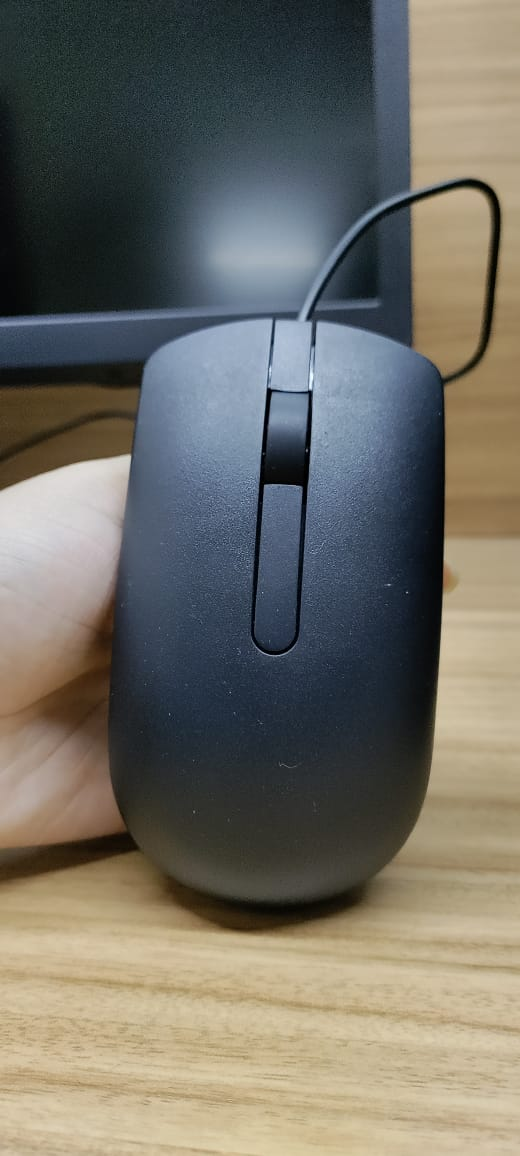

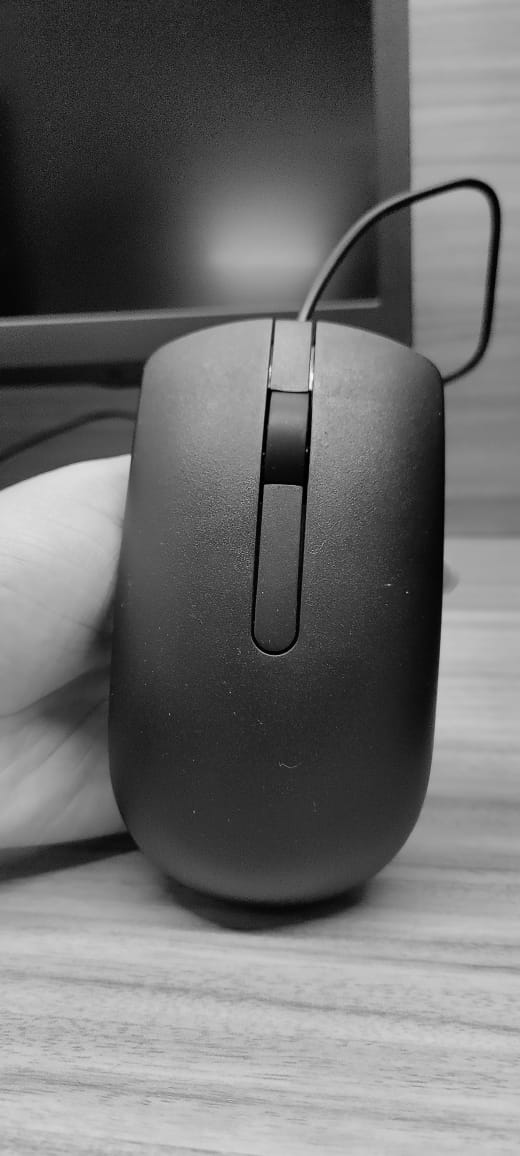

In [ ]:
img=cv2.imread('/content/reference.jpeg')
cv2_imshow(img)
print()
gray_image=cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)
cv2_imshow(gray_image)

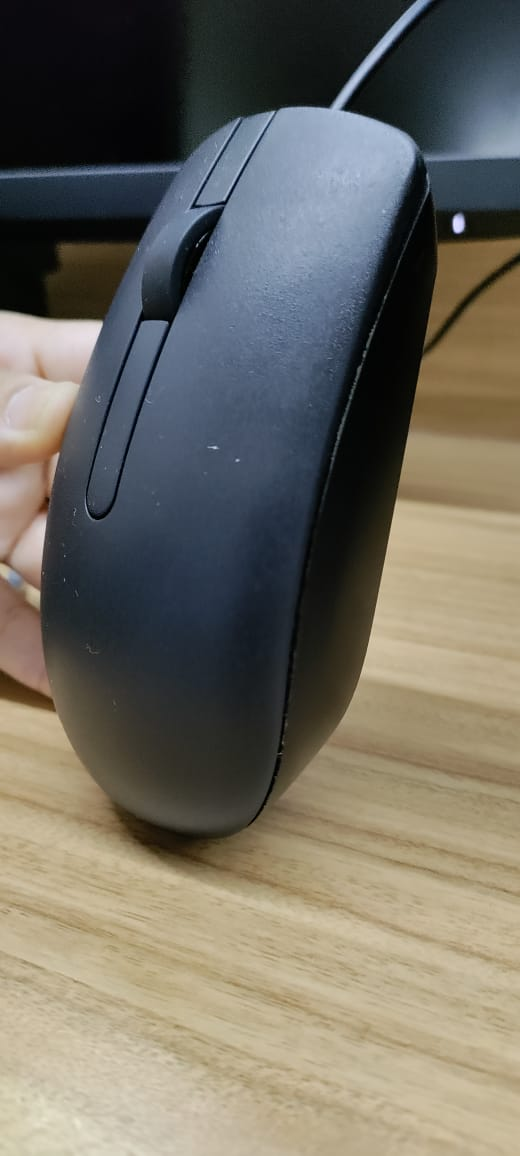

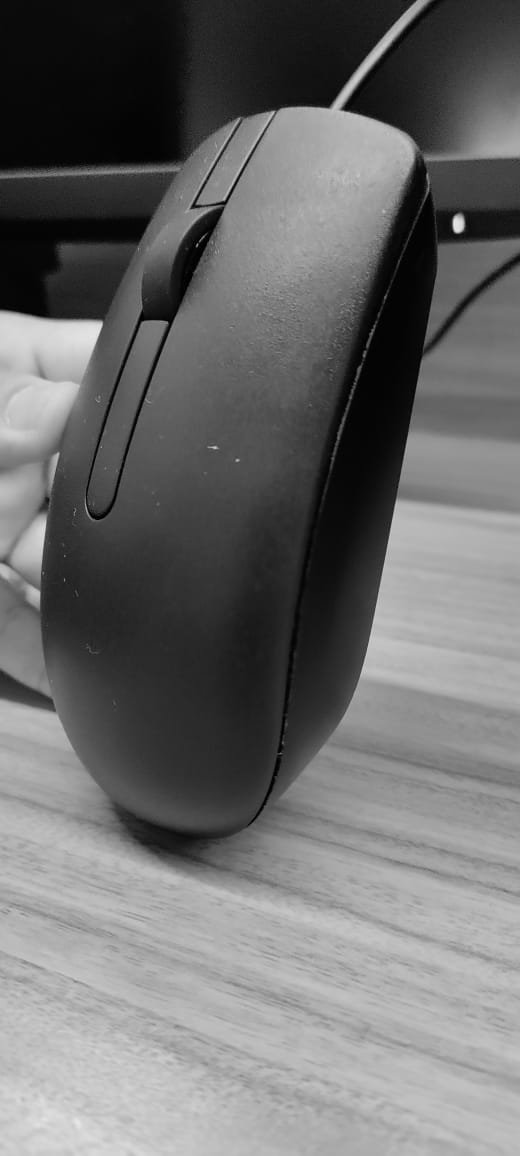

In [ ]:
img1=cv2.imread('/content/align.jpeg')
cv2_imshow(img1)
print()
gray_image1=cv2.cvtColor(img1,cv2.COLOR_BGR2GRAY)
cv2_imshow(gray_image1)

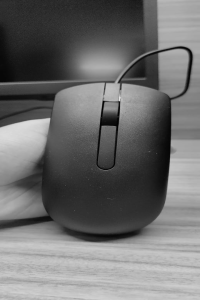

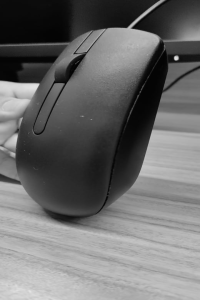

In [ ]:
#resize
ref=cv2.resize(gray_image, (200, 300), interpolation=cv2.INTER_AREA)
align=cv2.resize(gray_image1, (200,300),interpolation=cv2.INTER_AREA)
cv2_imshow(ref)
print()
cv2_imshow(align)

In [ ]:
import matplotlib.pyplot as plt

In [ ]:
sift=cv2.xfeatures2d.SIFT_create()

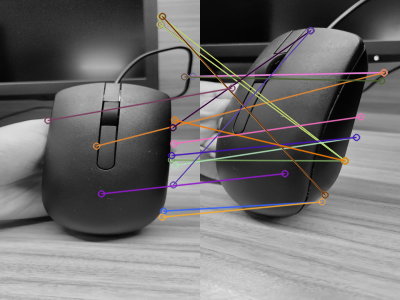

In [ ]:
keypoints1, descriptors1 = sift.detectAndCompute(ref, None)
keypoints2, descriptors2 = sift.detectAndCompute(align, None)

# Initialize Brute-Force matcher
bf = cv2.BFMatcher()

# Match descriptors between the images
matches = bf.match(descriptors1, descriptors2)

# Sort matches based on their distance
matches = sorted(matches, key=lambda x: x.distance)

# Draw top matches
result = cv2.drawMatches(ref, keypoints1, align, keypoints2, matches[:20], None, flags=2)

# Display the result
cv2_imshow(result)

Homography Matrix:
[[-2.22809976e+00  1.21762786e+00  1.48533318e+02]
 [-2.41721544e+00  1.30880758e+00  1.57484272e+02]
 [-1.53518659e-02  8.52676159e-03  1.00000000e+00]]



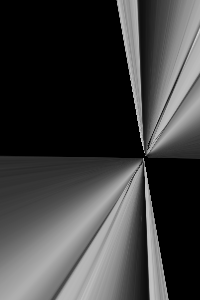

In [ ]:
# Extract matched keypoints
src_points = np.float32([keypoints1[m.queryIdx].pt for m in matches]).reshape(-1, 1, 2)
dst_points = np.float32([keypoints2[m.trainIdx].pt for m in matches]).reshape(-1, 1, 2)

# Compute homography matrix
H, _ = cv2.findHomography(src_points, dst_points, cv2.RANSAC, 5)

# Print the homography matrix
print("Homography Matrix:")
print(H)

print()
final = cv2.warpPerspective(ref, H, (align.shape[1], align.shape[0]))
cv2_imshow(final)